In [ ]:

import numpy as np

def sigmoid(z):
  return 1 / (1 + np.exp(-z))

def logistic_regression(X, y, learning_rate=0.01, num_iterations=1000):
  m, n = X.shape
  W = np.zeros((n, 1))
  b = 0

  for _ in range(num_iterations):
    Z = np.dot(X, W) + b
    A = sigmoid(Z)

    dW = (1 / m) * np.dot(X.T, (A - y))
    db = (1 / m) * np.sum(A - y)

    W = W - learning_rate * dW
    b = b - learning_rate * db
  return W, b


# Example usage
X = np.array([[1, 2], [2, 3], [3, 4], [4, 5]])
y = np.array([[0], [0], [1], [1]])

W, b = logistic_regression(X, y)
print("Weights:", W)
print("Bias:", b)

#Make a prediction
def predict(X, W, b):
    Z = np.dot(X,W) +b
    A = sigmoid(Z)
    return A > 0.5
#Example prediction
new_data_point = np.array([5,6])
prediction = predict(new_data_point.reshape(1,-1), W, b)
print(f"Prediction for {new_data_point}: {prediction}")


Weights: [[ 0.91260242]
 [-0.20690417]]
Bias: -1.1195065937669515
Prediction for [5 6]: [[ True]]


In [ ]:
import pandas as pd
df = pd.read_csv('heart.csv')
df.head()

,Unnamed: 0,Age,Sex,ChestPainType,Unnamed: 4,Hypertension,Unnamed: 6,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,KidneyFailure
0,1,40,M,ATA,NaN,140,NaN,289,N,Normal,172,N,0.0,Up,0,0
1,2,49,F,NAP,NaN,160,NaN,180,N,Normal,156,N,1.0,Flat,1,0
2,3,37,M,ATA,NaN,130,NaN,283,N,ST,98,N,0.0,Up,0,0
3,4,48,F,ASY,NaN,138,NaN,214,N,Normal,108,Y,1.5,Flat,1,0
4,5,54,M,NAP,NaN,150,NaN,195,N,Normal,122,N,0.0,Up,0,0


In [ ]:
x = df[["Age"]]
y = df[["HeartDisease"]]

In [ ]:
x_train , x_test , y_train , y_test = x[0:50] , x[50:] , y[0:50] , y[50:]

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

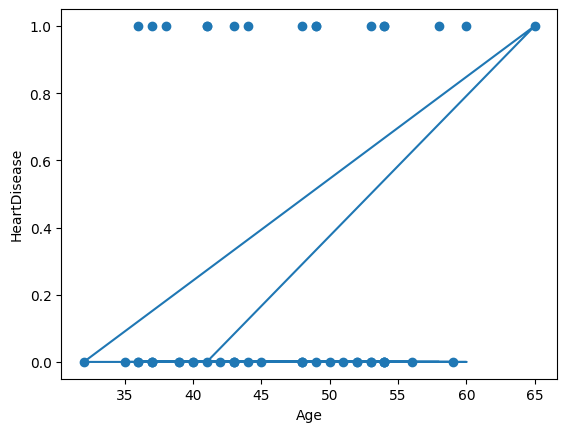

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x_train,y_train)
plt.plot(x_train,model.predict(x_train))
plt.xlabel("Age")
plt.ylabel("HeartDisease")
plt.show()

In [ ]:
model.score(x_test,y_test)

0.48847926267281105

In [ ]:
model.score(x_train,y_train)

0.7

In [ ]:
model.predict([[90]])

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1])